# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

## 读取数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv(r"D:\数据原料\Iris.csv")
original_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 评估和清理数据

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度

In [4]:
cleaned_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


非常的整齐，强迫症狂喜

### 数据干净度

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


`id`不应该是整数类型，可以改为字符串类型，`species`改为分类类型，即`category`，原因是节约空间,还有不存在空值

In [6]:
cleaned_data['Id'] = cleaned_data['Id'].astype('str')
cleaned_data['Id']

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

In [7]:
cleaned_data['Species'] = cleaned_data['Species'].astype('category')
cleaned_data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: category
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

#### 处理不一致数据

可能存在`Species`变量中，要查看是否有一个物种有多少个表示方法

In [8]:
cleaned_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

由此观之不存在

#### 处理无效或错误数据

In [9]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


并不存在无效或者错误数据

## 数据整理

对于数据整理来说，与此次分析目标紧密相关，此次分析目标是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异

所以我们可以基于`Sprcies`来提取出鸢尾花的种类来

In [12]:
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
len(iris_setosa)

50

In [13]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
iris_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [15]:
len(iris_versicolor)

50

## 探索数据

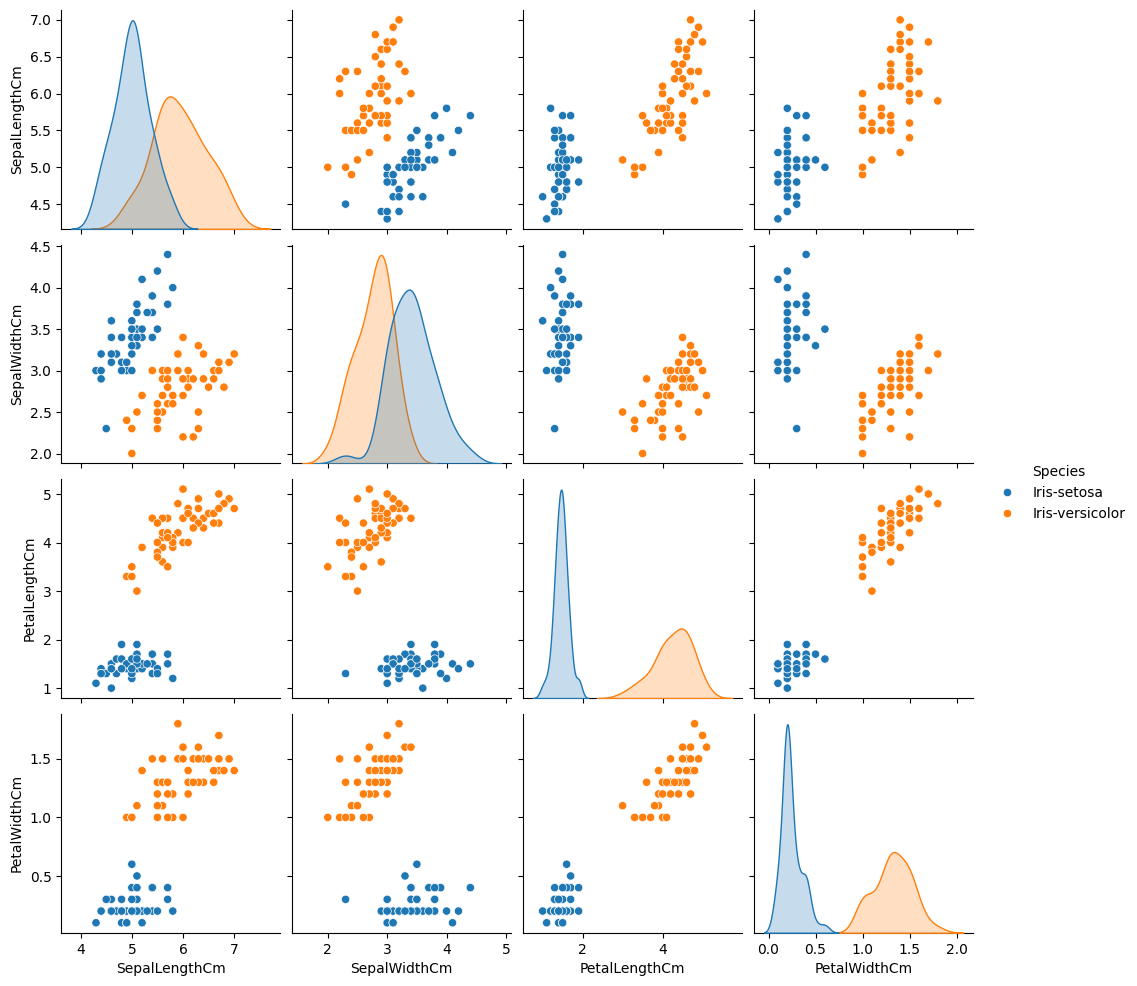

In [16]:
sns.pairplot(cleaned_data,hue = "Species")

从配对图来看，`iris-setosa`和`iris-versicolor`存在显著性差异，但是其中总有少部分有重合，所以不能武断的仍未其为显著性差异

## 分析数据

两组样本数量均为50，并没有远大于30，所以最好是选择t检验，此次分析目标是分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异

先引入t检验模块

In [17]:
from scipy.stats import ttest_ind

### 分析萼片长度

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

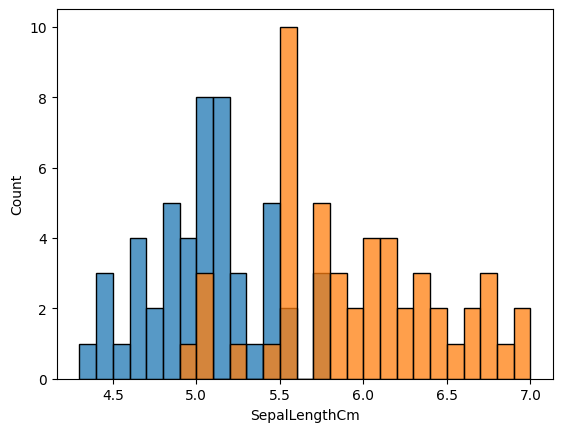

In [18]:
sns.histplot(iris_setosa['SepalLengthCm'],binwidth = 0.1)
sns.histplot(iris_versicolor['SepalLengthCm'],binwidth = 0.1)

#### 建立假设

$H_0$: Setosa鸢尾花萼片长度与versicolor鸢尾花萼片长度不存在显著差异

$H_1$: Setosa鸢尾花萼片长度与veisicolor鸢尾花萼片长度存在显著差异

#### 确然检验是单尾还是双尾

其检验的只是是否存在差异，不在乎那个品种的萼片更长更宽，因此是双尾

#### 确定显著水平

选择0.05的显著水平

#### 计算t值和p值

In [19]:
t_stat,p_value = ttest_ind(iris_setosa["SepalLengthCm"],iris_versicolor["SepalLengthCm"])
print(f"t值：{t_stat}")
print(f"p值:{p_value}")

t值：-10.52098626754911
p值:8.985235037487079e-18


p值远小于0.05，说明拒绝原假设

#### 结论

Setosa鸢尾花萼片长度与veisicolor鸢尾花萼片长度存在显著差异

### 分析萼片宽度

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

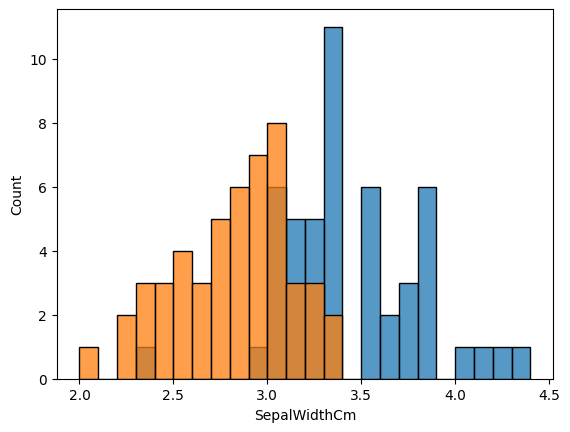

In [25]:
sns.histplot(iris_setosa["SepalWidthCm"],binwidth = 0.1)
sns.histplot(iris_versicolor["SepalWidthCm"],binwidth = 0.1)

#### 建立假设

$H_0$:Setosa鸢尾花萼片宽度与versicolor鸢尾花萼片宽度不存在显著差异

$H_1$:Setosa鸢尾花萼片宽度与versicolor鸢尾花萼片宽度存在显著差异

#### 确认检验是单尾还是双尾

目标只关注是否存在差异，不关注萼片品种谁宽

#### 确定显著水平

规定显著水平为0.05

#### 计算t值和p值

In [26]:
t_stat,p_value = ttest_ind(iris_setosa['SepalWidthCm'],iris_versicolor['SepalWidthCm'])
print(f"t值:{t_stat}")
print(f"p值:{p_value}")

t值:9.282772555558111
p值:4.362239016010214e-15


p值显著小于0.05

#### 结论

Setosa鸢尾花萼片宽度与veisicolor鸢尾花萼片宽度存在显著差异

### 分析花瓣长度

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

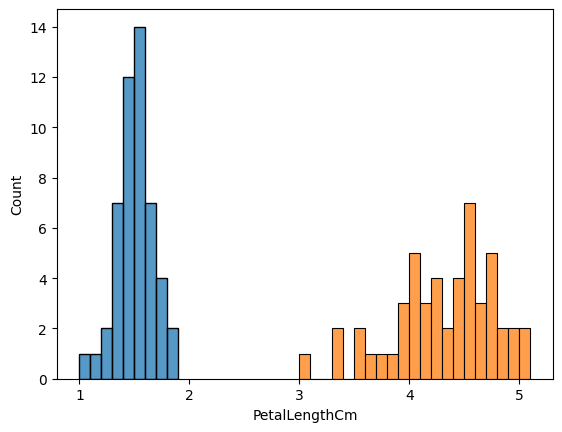

In [29]:
sns.histplot(iris_setosa['PetalLengthCm'],binwidth = 0.1)
sns.histplot(iris_versicolor['PetalLengthCm'],binwidth = 0.1)

#### 建立假设

$H_0$:Setosa鸢尾花花瓣长度与versicolor鸢尾花花瓣长度不存在显著差异

$H_1$:Setosa鸢尾花花瓣长度与versicolor鸢尾花花瓣长度存在显著差异

#### 确定单尾还是双尾检测

双尾

#### 确定显著水平

0.05

#### 计算t值和p值

In [30]:
t_stat,p_value = ttest_ind(iris_setosa['PetalLengthCm'],iris_versicolor['PetalLengthCm'])
print(f"t值:{t_stat}")
print(f"p值:{p_value}")

t值:-39.46866259397272
p值:5.717463758170621e-62


#### 结论

Setosa鸢尾花花瓣长度与versicolor鸢尾花花瓣长度存在显著差异

### 分析花瓣宽度

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

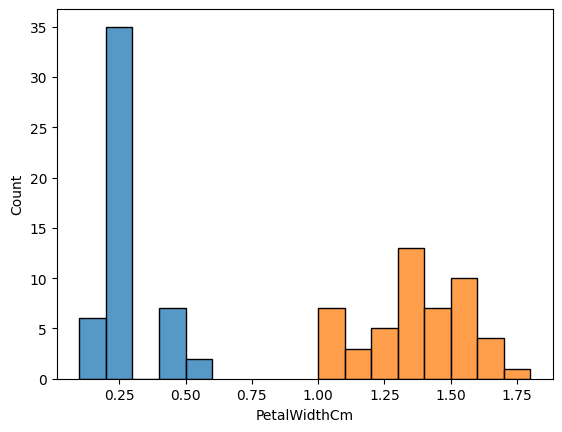

In [33]:
sns.histplot(iris_setosa['PetalWidthCm'],binwidth = 0.1)
sns.histplot(iris_versicolor['PetalWidthCm'],binwidth = 0.1)

#### 建立假设

$H_0$:Setosa鸢尾花花瓣宽度与versicolor鸢尾花花瓣宽度不存在显著差异

$H_1$:Setosa鸢尾花花瓣宽度与versicolor鸢尾花花瓣宽度存在显著差异

#### 确定单双尾

双尾检测

#### 确定显著水平

0.05

#### 计算t值和p值

In [35]:
t_stat,p_value = ttest_ind(iris_setosa['PetalWidthCm'],iris_versicolor['PetalWidthCm'])
print(f"t值:{t_stat}")
print(f"p值:{p_value}")

t值:-34.01237858829048
p值:4.589080615710866e-56


#### 结论

Setosa鸢尾花花瓣宽度与versicolor鸢尾花花瓣宽度存在显著差异